       Country    2020      2021      2022      2023      2024      2025
0  Afghanistan   20136   14278.0   14501.0   17248.0       NaN       NaN
1      Albania   15271   18086.0   19185.0   23388.0   27259.0   28372.0
2      Algeria  164774  185850.0  225709.0  247789.0  264913.0  268885.0
3      Andorra    2885    3325.0    3376.0    3786.0    4038.0    4035.0
4       Angola   66521   84375.0  142442.0  109764.0  115946.0  113343.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB
None
               2020          2021          2022 

C:\Users\vamsh\AppData\Local\Temp\ipykernel_17960\505945143.py:15: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_long["Growth"] = df_long.groupby("Country")["GDP"].pct_change() * 100


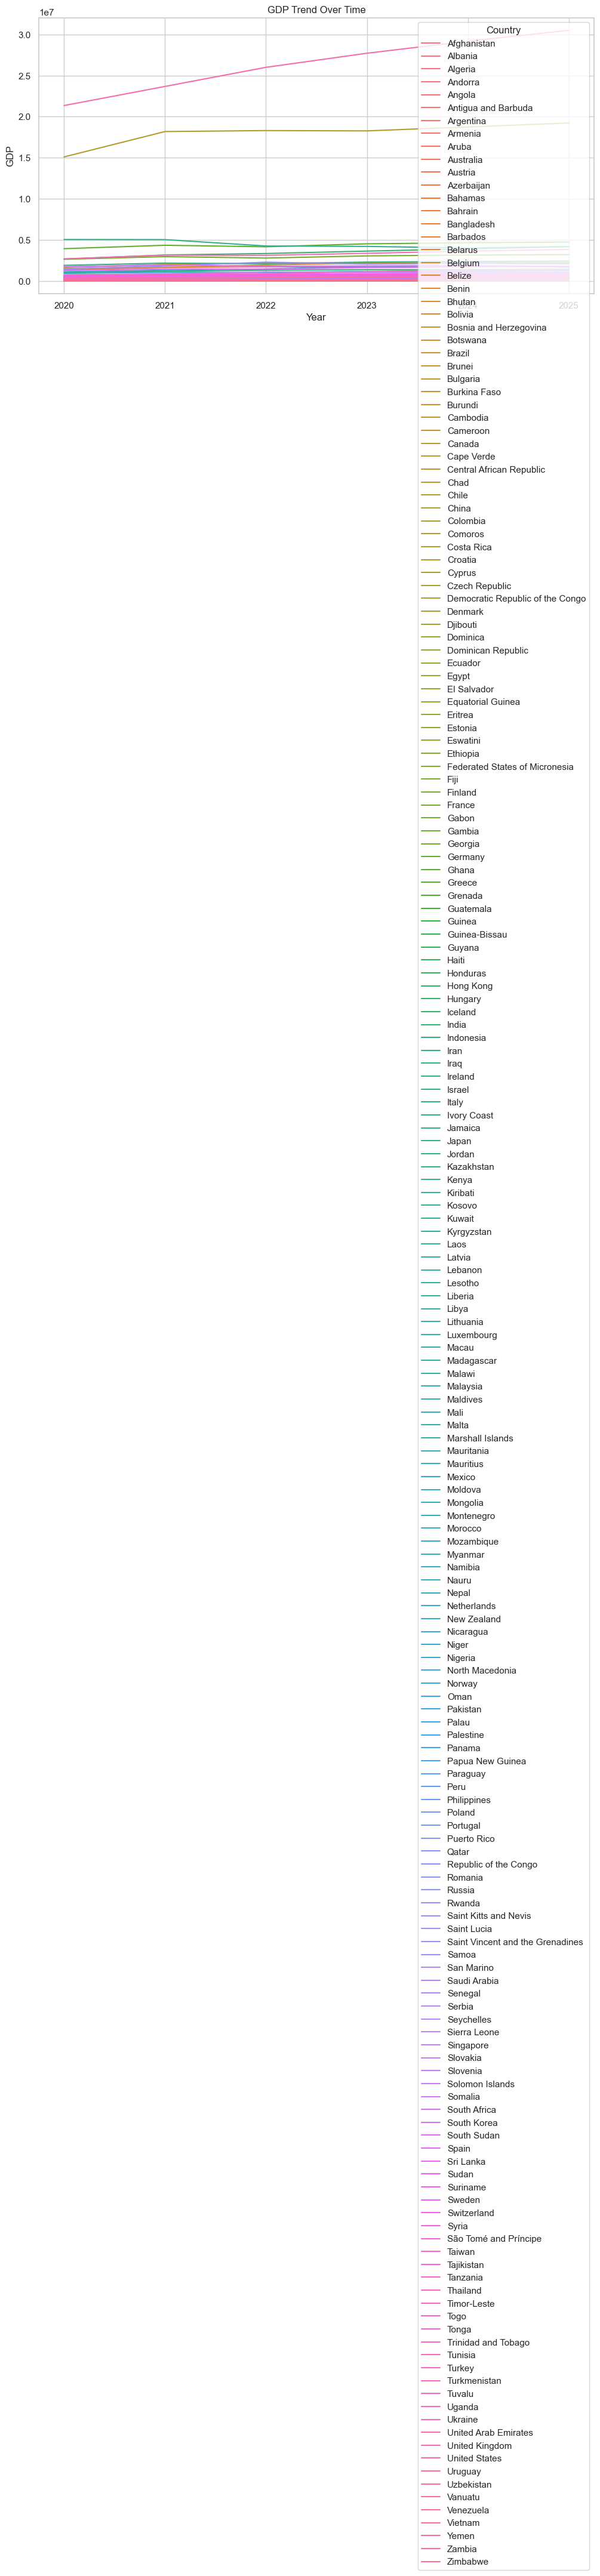

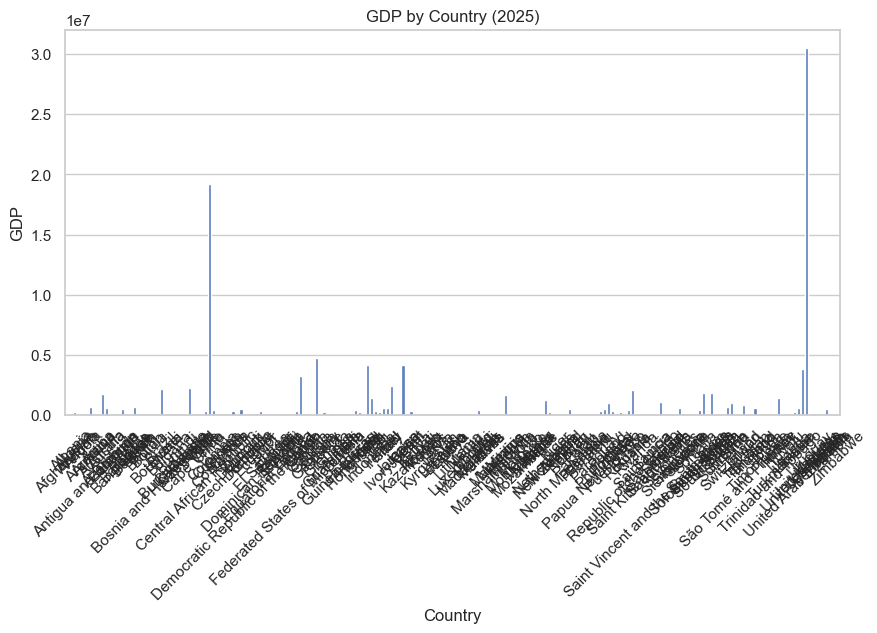

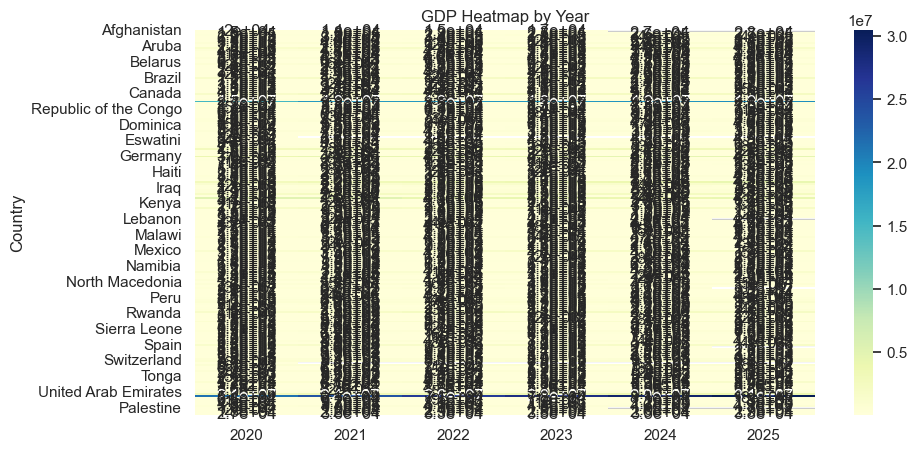

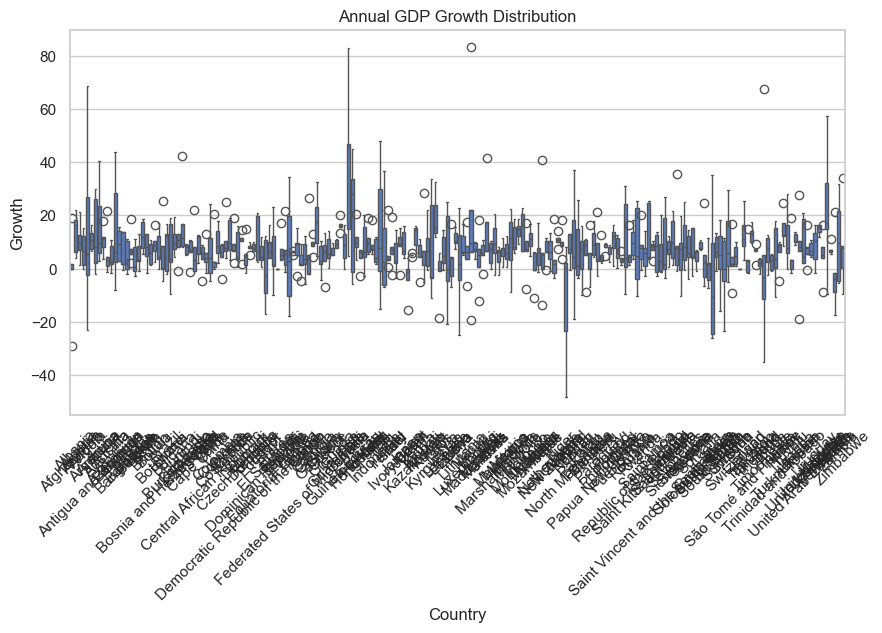

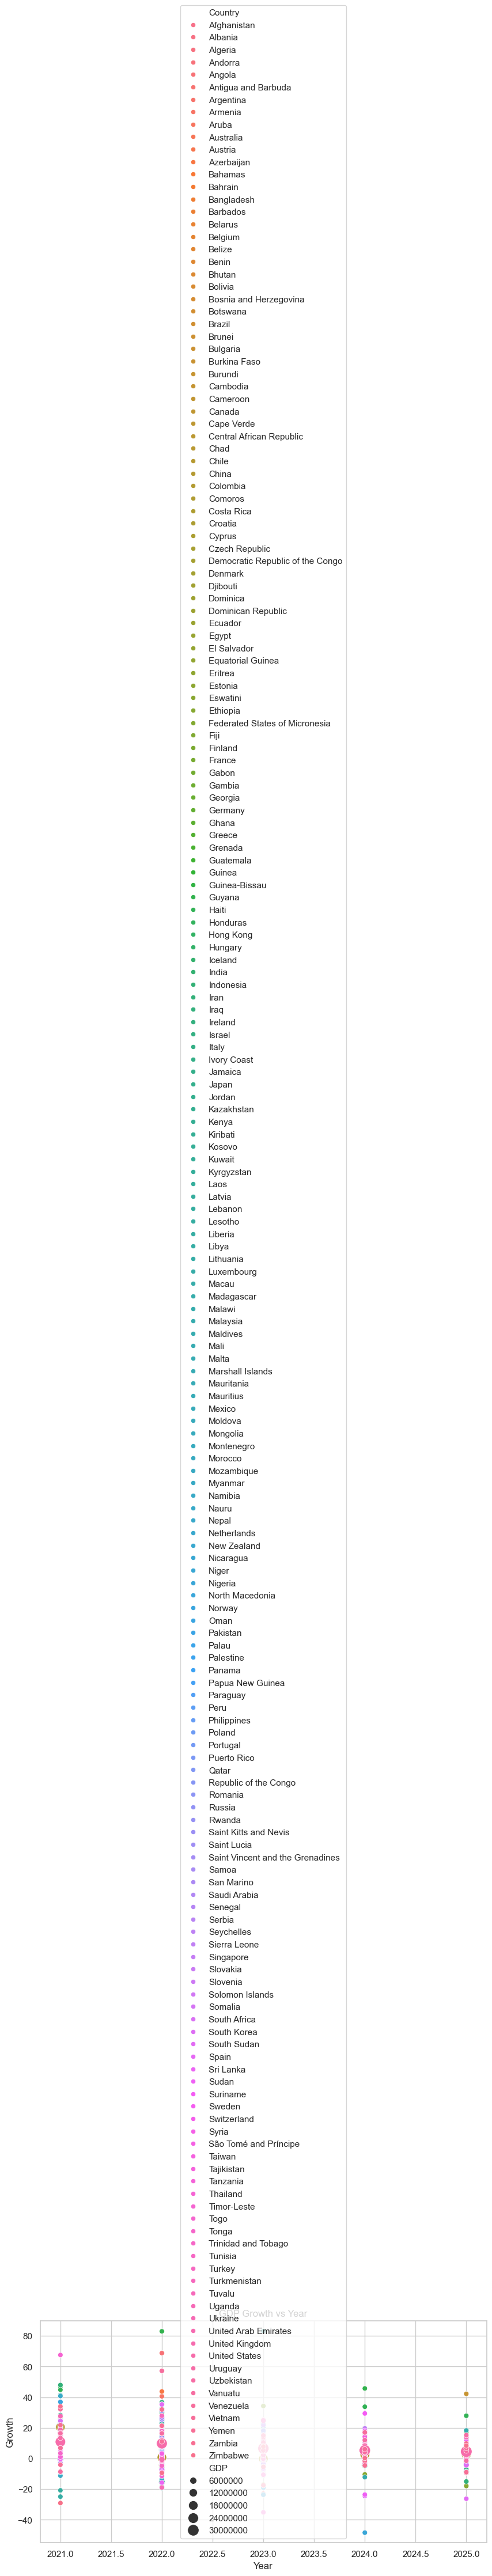

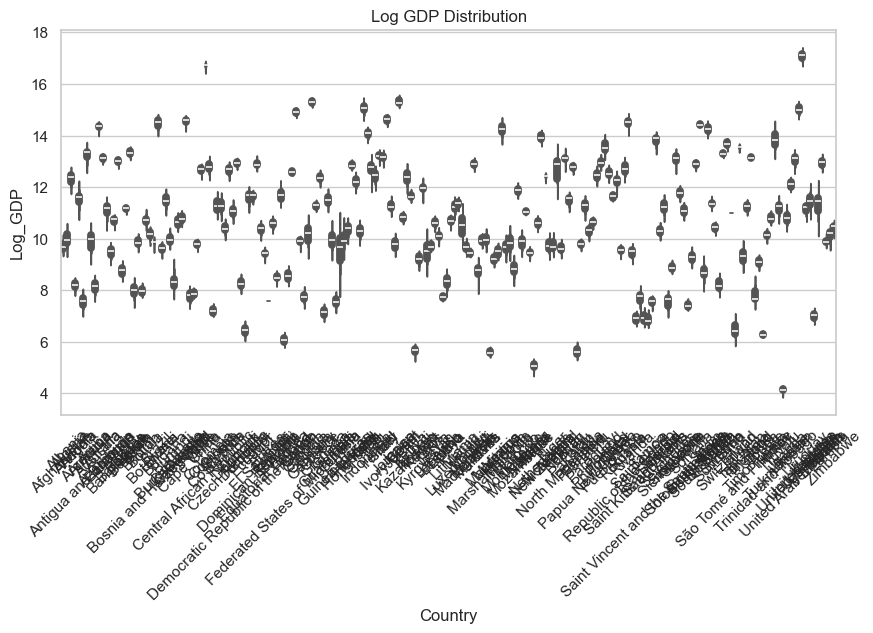

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../2020-2025.csv")
print(df.head())
print(df.info())
print(df.describe())

df_long = df.melt(id_vars=["Country"], var_name="Year", value_name="GDP")
df_long["Year"] = df_long["Year"].astype(int)
df_long = df_long.sort_values(["Country", "Year"])

df_long["Growth"] = df_long.groupby("Country")["GDP"].pct_change() * 100
df_long["Log_GDP"] = np.log(df_long["GDP"])
df_long["Rolling_Growth"] = df_long.groupby("Country")["Growth"].transform(lambda x: x.rolling(2).mean())

arr = df_long["GDP"].dropna().to_numpy()
print(np.mean(arr))
print(np.median(arr))
print(np.std(arr))
print(np.percentile(arr, [25, 75]))

sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x="Year", y="GDP", hue="Country")
plt.title("GDP Trend Over Time")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_long[df_long["Year"] == 2025], x="Country", y="GDP")
plt.title("GDP by Country (2025)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df.set_index("Country"), annot=True, cmap="YlGnBu")
plt.title("GDP Heatmap by Year")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_long, x="Country", y="Growth")
plt.title("Annual GDP Growth Distribution")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_long, x="Year", y="Growth", hue="Country", size="GDP", sizes=(40, 200))
plt.title("GDP Growth vs Year")
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df_long, x="Country", y="Log_GDP")
plt.title("Log GDP Distribution")
plt.xticks(rotation=45)
plt.show()
